<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

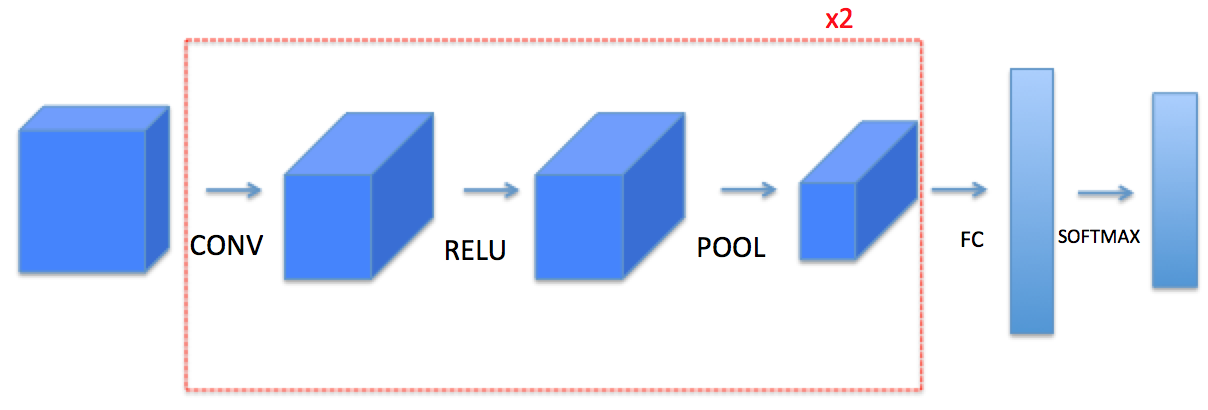


In [2]:
def zero_pad(X, pad):
  X_pad = np.pad(X, ( (0,0) , (pad,pad) , (pad,pad) , (0,0) ))
  return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


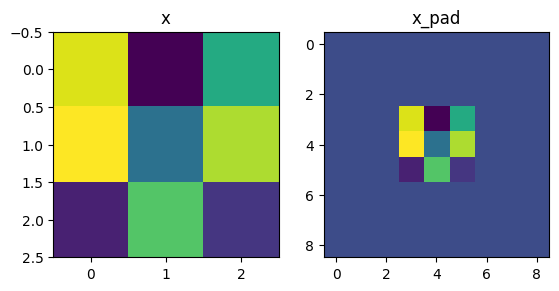

In [3]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 3)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])

***Convolution Function***


---



In [4]:
def conv_sigle_step(slice, w, b):
  ele_wise_mul = np.multiply(a_prev_slice, )
  sum = np.sum(ele_wise_mul)
  Z = np.float64(sum + b)
  return Z

In [5]:
def conv_forward(A_prev, W, b, hparameters):
  (m, n_H_prev, n_W_prev, n_C_prev) = np.shape(A_prev)
  (f, f, n_C_prev, n_C) = np.shape(W)
  pad = hparameters['pad']
  stride = hparameters['stride']

  n_H = np.int((n_H_prev - f + 2*pad)/stride) + 1
  n_W = np.int((n_W_prev - f + 2*pad)/stride) + 1

  Z = np.zeros((m , n_H, n_W, n_C))
  A_prev_pad = np.pad(A_prev, ((0,0), (pad,pad), (pad,pad), (0,0)))

  for i in range(m):
    a_prev_pad = A_prev_pad[i]
    for h in range(n_H):
      vert_start = h * stride
      vert_end = vert_start + f
      for w in range(n_W):
        horiz_start = w * stride
        horiz_end = horiz_start + f
        for c in range(n_C):
          a_slice_prev = a_prev_pad[ vert_start:vert_end , horiz_start:horiz_end , : ]

          weights = W[:, :, :, c]
          biases = b[:, :, :, c]
          Z[i, h, w, c] = np.sum(np.multiply(a_slice_prev, weights)) + float(biases)

  cache = (A_prev, W, b, hparameters)
  return Z, cache

In [6]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)

<ipython-input-5-ab35e56446b2>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n_H = np.int((n_H_prev - f + 2*pad)/stride) + 1
<ipython-input-5-ab35e56446b2>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 

***MAX POOL FUNCTION***

---



In [7]:
def Maxpool(A_prev, hparameters, mode = "max"):
  (m, n_H_prev, n_W_prev, n_C_prev) = np.shape(A_prev)
  f = hparameters['f']
  stride = hparameters['stride']

  n_H = int(1 + (n_H_prev - f) / stride)
  n_W = int(1 + (n_W_prev - f) / stride)
  n_C = n_C_prev

  A = np.zeros((m, n_H, n_W, n_C))

  for i in range(m):
    for h in range(n_H):
      vert_start = h * stride
      vert_end = vert_start + f
      for w in range(n_W):
        horiz_start = w * stride
        horiz_end = horiz_start + f
        for c in range(n_C):
          a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
          if mode == "max":
            A[i,h,w,c] = np.max(a_prev_slice)
  cache = (A_prev, hparameters)
  return A, cache

In [10]:
def AvgPool(A_prev, hparameters, mode = "max"):
  (m, n_H_prev, n_W_prev, n_C_prev) = np.shape(A_prev)
  f = hparameters['f']
  stride = hparameters['stride']

  n_H = int(1 + (n_H_prev - f) / stride)
  n_W = int(1 + (n_W_prev - f) / stride)
  n_C = n_C_prev

  A = np.zeros((m, n_H, n_W, n_C))

  for i in range(m):
    for h in range(n_H):
      vert_start = h * stride
      vert_end = vert_start + f
      for w in range(n_W):
        horiz_start = w * stride
        horiz_end = horiz_start + f
        for c in range(n_C):
          a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
          if mode == "average":
            A[i,h,w,c] = np.mean(a_prev_slice)
  cache = (A_prev, hparameters)
  return A, cache